# Project: Wrangling and Analyze Data

In [1]:
#import libraries
import pandas as pd
import tweepy
import os
import requests
import json
import numpy as np
from timeit import default_timer as timer
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Load manually downloaded file
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Download file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#Write file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

#Load file
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
###This code is commented out so that it is not run during the evaluation.
###Without the proper credentials, the tweet_json.txt is overwritten with a blank file.

##Log in to the API
#consumer_key = 'confidential'
#consumer_secret = 'confidential'
#access_token = 'confidential'
#access_secret = 'confidential'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#tweet_ids = df_tweets.tweet_id.values
#len(tweet_ids)

## Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
## Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [5]:
#Load json file 
tweets = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        tweets.append({'tweet_id' : tweet_id,
                      'retweet_count' : retweet_count,
                      'favorite_count' : favorite_count})
df_counts = pd.DataFrame(data=tweets)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment and
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
#Assess visually
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
#assess programmatically
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
df_tweets['tweet_id'].duplicated().sum()

0

In [10]:
df_tweets.shape[0] - len(df_tweets.query('rating_numerator > 0' and 'rating_numerator < 16'))

26

In [11]:
df_tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
#Assess visually
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
df_tweets.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [14]:
#assess programmatically
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
df_predictions['tweet_id'].duplicated().sum()

0

In [17]:
df_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1934,859851578198683649,https://pbs.twimg.com/media/C-7OcfyXsAAsqzU.jpg,4,Labrador_retriever,0.899086,True,golden_retriever,0.047091,True,kuvasz,0.023206,True
460,674793399141146624,https://pbs.twimg.com/media/CV1ZA3oWEAA1HW_.jpg,1,giant_schnauzer,0.119693,True,Afghan_hound,0.072763,True,miniature_schnauzer,0.063786,True
1626,804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,web_site,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False
1632,805826884734976000,https://pbs.twimg.com/ext_tw_video_thumb/80582...,1,Siberian_husky,0.248926,True,American_Staffordshire_terrier,0.098313,True,Eskimo_dog,0.080188,True
978,707059547140169728,https://pbs.twimg.com/media/Cc_64zVWEAAeXs7.jpg,1,Samoyed,0.897312,True,Great_Pyrenees,0.039180,True,kuvasz,0.019516,True


In [18]:
#Assess visually
df_counts

,favorite_count,retweet_count,tweet_id
0,34294,7121,892420643555336193
1,29733,5364,892177421306343426
2,22375,3530,891815181378084864
3,37482,7324,891689557279858688
4,35799,7870,891327558926688256
5,18071,2645,891087950875897856
6,10521,1693,890971913173991426
7,57672,16011,890729181411237888
8,24888,3669,890609185150312448
9,28367,6185,890240255349198849


In [19]:
#assess programmatically
df_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
favorite_count    2328 non-null int64
retweet_count     2328 non-null int64
tweet_id          2328 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [20]:
df_counts.describe()

,favorite_count,retweet_count,tweet_id
count,2328.000000,2328.000000,2.328000e+03
mean,7154.710481,2509.613402,7.418403e+17
std,11116.162798,4250.239746,6.823143e+16
min,0.000000,1.000000,6.660209e+17
25%,1240.000000,504.750000,6.781974e+17
50%,3090.500000,1168.000000,7.180382e+17
75%,8733.000000,2907.250000,7.986673e+17
max,146868.000000,71934.000000,8.924206e+17


In [21]:
df_counts['tweet_id'].duplicated().sum()

0

### Quality issues
1. df_tweets includes retweeted posts, which should be removed since we only want the original posts.

2. df_tweets includes some posts that are not about dogs. 

3. df_tweets has incorrect data types. Timestamp and retweeted_timestamp should be date/time.  tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id should be string/text. The tweet_id columns in df_predictions and df_counts should be a string/text.

4. Four denominators are incorrect, such as the value 11, which was pulled from a 9/11 reference in the text, rather than pulling the actual score.  

5. There are also errors in the ratings if multiple dogs are in a photo. The score is calculated as 10 multipled by the number of dogs involved. Those values need to be normalized or removed as outliers.

6. The numerator values should range from 1 - 15 per https://15outof10.org/our-story/. Values out of this range need to be looked at to see if the correct ratings are found elsewhere.  There are 26 records that are out of range.

7. df_tweets has too many columns in the dataframe, many of which will not be needed for the analysis.  Remove the extraneous columns to improve readability.

8. df_predictions has 66 instances where a row has the same jpg_url, but different tweet IDs. each tweet_id should only be included once in the predictions dataframe.

### Tidiness issues
1. In df_tweets, the last four columns representing each dog's "stage", should be one column rather than 4.

2. All three dataframes need to be merged together for two purposes. First, only tweets that have an image are to be evaluated and that information is found by merging df_tweets with df_predictions. Second, the data in df_counts is additional attributes to the df_tweets items and should be combined. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
tweets_clean = df_tweets.copy()
predictions_clean = df_predictions.copy()
counts_clean = df_counts.copy()

### Remove retweeted posts in df_tweets.

#### Define: 
> Drop any rows that have a value in the "retweeted_status_id" column.

#### Code

In [23]:
tweets_clean = tweets_clean[pd.isnull(tweets_clean.retweeted_status_id)]

#### Test

In [24]:
# Values should be null
tweets_clean.retweeted_status_id.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: retweeted_status_id, dtype: float64

### Remove tweets that are not about dogs.

#### Define
> Drop any rows that have the phrase "we only rate dogs" or "We only rate dogs" in the text column.

#### Code

In [25]:
tweets_clean = tweets_clean[tweets_clean['text'].str.contains("We only rate dogs|we only rate dogs|We. Only. Rate. Dogs|don't rate")==False]

#### Test

In [26]:
# Search for the phrase "we only rate dogs". It should return no results.
tweets_clean[tweets_clean['text'].str.contains("We only rate dogs|we only rate dogs|We. Only. Rate. Dogs|don't rate")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Incorrect data types

#### Define
>df_tweets: 
>1. Change timestamp and retweeted_timestamp to datetime.
>2. Change tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id to string/text. 

>df_predictions
>1. Change the tweet_id column to a string/text.

>df_counts
>1. Change the tweet_id column to a string/text.

#### Code

In [27]:
# To datetime
tweets_clean.timestamp = pd.to_datetime(tweets_clean.timestamp)
tweets_clean.retweeted_status_timestamp = pd.to_datetime(tweets_clean.retweeted_status_timestamp)

# To string
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)
tweets_clean.in_reply_to_status_id = tweets_clean.in_reply_to_status_id.astype(str)
tweets_clean.in_reply_to_user_id = tweets_clean.in_reply_to_user_id.astype(str)
tweets_clean.retweeted_status_id = tweets_clean.retweeted_status_id.astype(str)
tweets_clean.retweeted_status_user_id = tweets_clean.retweeted_status_user_id.astype(str)
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)
counts_clean.tweet_id = counts_clean.tweet_id.astype(str)

#### Test

In [28]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2106 non-null object
in_reply_to_status_id         2106 non-null object
in_reply_to_user_id           2106 non-null object
timestamp                     2106 non-null datetime64[ns]
source                        2106 non-null object
text                          2106 non-null object
retweeted_status_id           2106 non-null object
retweeted_status_user_id      2106 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2048 non-null object
rating_numerator              2106 non-null int64
rating_denominator            2106 non-null int64
name                          2106 non-null object
doggo                         2106 non-null object
floofer                       2106 non-null object
pupper                        2106 non-null object
puppo                         2106 non-null object
dtypes: datetim

In [29]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [30]:
counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
favorite_count    2328 non-null int64
retweet_count     2328 non-null int64
tweet_id          2328 non-null object
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Duplicate predictions

#### Define

> Drop the 66 instances of duplicate rows in the jpg_url column by using the drop_duplicates function with the subset criteria set to the jpg_url column.

#### Code

In [31]:
# Leave the default of keeping the first occurrence and dropping any additional rows.
predictions_clean.drop_duplicates(subset='jpg_url', inplace=True)

#### Test

In [32]:
# tweet_id 752309394570878000 is the duplicate of this jpg_url https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg
predictions_clean.query('tweet_id == 752309394570878000')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Cleaning for Tidiness

### Remove Extraneous Columns from tweets & predictions

#### Define
> Drop the following columns from df_tweets to keep the columns that are pertinent to analysis: in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

> Drop the following columns from df_predictions: p2, p2_conf, p2_dog, p3, p3_conf, p3_dog

#### Code

In [33]:
tweets_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id',  
                                  'retweeted_status_user_id', 'retweeted_status_timestamp', 
                                  'expanded_urls'], axis=1, inplace=True)

predictions_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
                      axis=1, inplace=True)

#### Test

In [34]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2106 non-null object
timestamp             2106 non-null datetime64[ns]
text                  2106 non-null object
rating_numerator      2106 non-null int64
rating_denominator    2106 non-null int64
name                  2106 non-null object
doggo                 2106 non-null object
floofer               2106 non-null object
pupper                2106 non-null object
puppo                 2106 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 181.0+ KB


In [35]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 96.1+ KB


### Four Dog Stage Columns should be One Column

#### Define
> The four columns, doggo, floofer, pupper, and puppo, need to be melted together to form a new column "dog_stage"

#### Code

In [36]:
# Melt the four dog stage columns.
tweets_clean = pd.melt(tweets_clean, id_vars = ['tweet_id', 'timestamp', 'text',
                                               'rating_numerator', 'rating_denominator', 'name'],
                      var_name='dog_stage', value_name = 'stage')

# Not all of the dogs have a dog_stage. Replace "None" with "unknown" so the aggregation works correctly
tweets_clean.stage.replace('None', 'unknown', inplace=True)

# Aggragate the multiple versions of each tweet_id, returning the minimum value of the stage.
tweets_clean = tweets_clean.groupby(['tweet_id']).min()

# Remove the un-needed "dog_stage" column
tweets_clean.drop('dog_stage', axis=1, inplace=True)

#### Test

In [37]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2106 entries, 666020888022790149 to 892420643555336193
Data columns (total 6 columns):
timestamp             2106 non-null datetime64[ns]
text                  2106 non-null object
rating_numerator      2106 non-null int64
rating_denominator    2106 non-null int64
name                  2106 non-null object
stage                 2106 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 115.2+ KB


In [38]:
tweets_clean.stage.value_counts()

unknown    1762
pupper      224
doggo        87
puppo        24
floofer       9
Name: stage, dtype: int64

In [39]:
# Specific tweet_id that has a known stage to verify that only one version of the ID exists
tweets_clean.query('tweet_id == "822462944365645825"')

,timestamp,text,rating_numerator,rating_denominator,name,stage
tweet_id,,,,,,
822462944365645825,2017-01-20 15:17:01,This is Gabe. He was the unequivocal embodimen...,14,10,Gabe,pupper


### Merge Dataframes

#### Define
>Only tweets that have an image are to be evaluated and that information is found by merging df_tweets with df_predictions with an inner join. Second, the data in df_counts contains additional attributes to the df_tweets items and should be combined to the new master dataframe using a left join.

>The integrated dataframe will be called df for now since many of the upcoming cleaning tasks will require the df name to be used multiple times. This will help to keep the code cleaner and easier to follow. In the storing step, it will be renamed to a more descriptive term.

#### Code

In [40]:
dfs= [tweets_clean, predictions_clean, counts_clean]
df = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],     
                                                how='inner'), dfs)

#### Test

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 0 to 1921
Data columns (total 14 columns):
tweet_id              1922 non-null object
timestamp             1922 non-null datetime64[ns]
text                  1922 non-null object
rating_numerator      1922 non-null int64
rating_denominator    1922 non-null int64
name                  1922 non-null object
stage                 1922 non-null object
jpg_url               1922 non-null object
img_num               1922 non-null int64
p1                    1922 non-null object
p1_conf               1922 non-null float64
p1_dog                1922 non-null bool
favorite_count        1922 non-null int64
retweet_count         1922 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 212.1+ KB


## Cleaning for Quality

### Four rows have incorrect ratings because of numerical values in the text description.

#### Define
>Find the text for this tweet_id to fix the incorrect rating. The event 9/11, the expression 24/7, the store 7/11, and the age 3 1/2 were the causes of these denominator anomalies.  

#### Code

In [42]:
# Identify the specific rows.
df[df.rating_denominator.isin(['2','7', '11'])]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count
20,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian...,1,2,an,unknown,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,125,57
656,682962037429899265,2016-01-01 16:30:13,This is Darrel. He just robbed a 7/11 and is i...,7,11,Darrel,unknown,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,34355,15130
1161,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She ...",9,11,None,unknown,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,33065,12333
1563,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,unknown,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,5127,1356


In [43]:
# The result was 9/10 for index 20
df.loc[df.tweet_id == '666287406224695296', 'rating_numerator'] = 9
df.loc[df.tweet_id == '666287406224695296', 'rating_denominator'] = 10

In [44]:
# The result was 10/10 for index 656
df.loc[df.tweet_id == '682962037429899265', ['rating_numerator', 'rating_denominator']] = 10

In [45]:
# The result was 14/10 for index 1161
df.loc[df.tweet_id == '740373189193256964', 'rating_numerator'] = 14
df.loc[df.tweet_id == '740373189193256964', 'rating_denominator'] = 10

In [46]:
# The result is not in the text field for index 1563.
# One commentor on the post suggested 11/10, so we will choose that value.
df.loc[df.tweet_id == '810984652412424192', 'rating_numerator'] = 11
df.loc[df.tweet_id == '810984652412424192', 'rating_denominator'] = 10

#### Test

In [47]:
df[df.tweet_id.isin(['666287406224695296','682962037429899265','740373189193256964','810984652412424192'])]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count
20,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian...,9,10,an,unknown,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,125,57
656,682962037429899265,2016-01-01 16:30:13,This is Darrel. He just robbed a 7/11 and is i...,10,10,Darrel,unknown,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,34355,15130
1161,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She ...",14,10,None,unknown,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,33065,12333
1563,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,11,10,Sam,unknown,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,5127,1356


### Normalize ratings where multiple dogs are in a picture

#### Define
> The rating adjustment, made by WeRateDogs, for multiple dogs in one picture appears to take the score and multiply it by the number of dogs in the picture. To normalize these values, the rating_denominator will be divided by 10 to get the number of dogs in each picture. Next, the rating_numerator will be divided by the number of dogs, and the rating_denominator will be updated to 10.  This will reflect the average rate per dog.

#### Code

In [48]:
# If the denominator equals 10, then nothing happens. If it does not, the numerator will be replaced with the 
# numerator value multiplied by 10 and then divided by the denominator value to get the per-dog score
df['rating_numerator'] = np.where(df.rating_denominator == 10, df.rating_numerator, 
                                   df.rating_numerator * 10 // df.rating_denominator)

# Set all denominator values equal to 10
df['rating_denominator'] = 10

#### Test

In [49]:
# There should only be values for 10
df.rating_denominator.value_counts()

10    1922
Name: rating_denominator, dtype: int64

In [50]:
# This tweet_id originally had a score of 204/170
df.query('tweet_id == "731156023742988288"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count
1119,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,12,10,this,unknown,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,3602,1165


### Out-of-Range Numerator Values

#### Define

>The numerator values should range from 1 - 15 per https://15outof10.org/our-story/. Records with values out of this range will be removed as outliers. This is the final cleaning step since some of the original 26 identified records were most likely corrected in the previous steps.

#### Code

In [51]:
# Set the dataframe to the in-bounds numerator range
df = df.query('rating_numerator > 0')
df = df.query('rating_numerator < 16')

#### Test

In [52]:
# It should only show values between 1 and 15 inclusive
df.rating_numerator.value_counts()

12    437
10    407
11    389
13    251
9     141
8      93
7      50
14     35
5      33
6      32
3      18
4      15
2      10
1       4
Name: rating_numerator, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [53]:
df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [54]:
df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,favorite_count,retweet_count
count,1915.000000,1915.0,1915.000000,1915.000000,1915.000000,1915.000000
mean,10.550392,10.0,1.205744,0.592169,7567.110183,2214.219843
std,2.175897,0.0,0.565896,0.272617,11333.084369,4046.388659
min,1.000000,10.0,1.000000,0.044333,67.000000,11.000000
25%,10.000000,10.0,1.000000,0.359715,1595.500000,491.000000
50%,11.000000,10.0,1.000000,0.587101,3381.000000,1064.000000
75%,12.000000,10.0,1.000000,0.846807,9420.000000,2497.500000
max,14.000000,10.0,4.000000,1.000000,146868.000000,71934.000000


In [55]:
df.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count
0,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,unknown,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,2312,431


Is there an observed correlation between the retweet count and the favorite count?

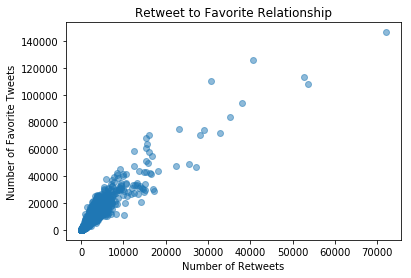

In [63]:
x = df.retweet_count
y = df.favorite_count

plt.plot(x, y, 'o', alpha = 0.5);
plt.gca().set(xlabel = 'Number of Retweets', ylabel = 'Number of Favorite Tweets',
              title = 'Retweet to Favorite Relationship');

How accurate is the prediction model?  What shape is the distribution for correct and incorrect predictions?

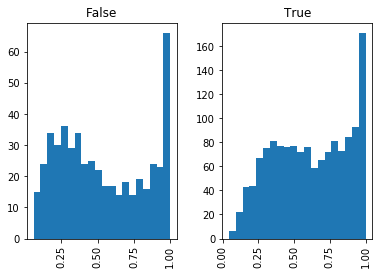

In [65]:
df.p1_conf.hist(by=df.p1_dog, bins = 20);

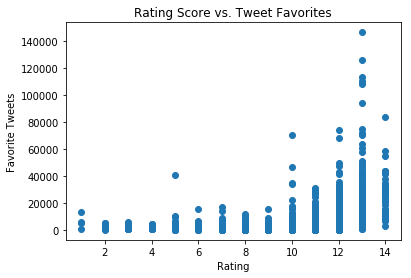

In [58]:
plt.scatter(df['rating_numerator'], df['favorite_count'])
plt.gca().set(xlabel='Rating', ylabel='Favorite Tweets', 
              title='Rating Score vs. Tweet Favorites');

### Insights:
1. There appears to be a strong positive correlation between favorited and retweeted entries.

2. From a purely volume perspective, the prediction model predicts correctly more often than not.  Looking at the shapes of the distribution of correct and incorrect predictions, the correct model is slightly skewed to the winning side.

3. The ratings that WeRateDogs give tweets is skewed left. The higher the rating that is given, the more times that picture is made a favorite. 

### Visualization

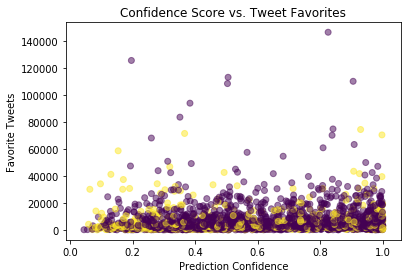

In [59]:
plt.scatter(df['p1_conf'], df['favorite_count'], c=pd.factorize(df['p1_dog'])[0], alpha = 0.5)
plt.gca().set(xlabel='Prediction Confidence', ylabel='Favorite Tweets', 
              title='Confidence Score vs. Tweet Favorites');

This visualization shows that with the exception of a values above about 40,000 tweet favorites, there does not appear to be any relationship between having a high confidence rating with having a high number of favorite tweets and the correctness of the prediction result.

(0, 40000)

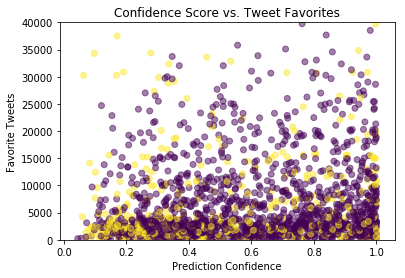

In [66]:
plt.scatter(df['p1_conf'], df['favorite_count'], c=pd.factorize(df['p1_dog'])[0], alpha = 0.5)
plt.gca().set(xlabel='Prediction Confidence', ylabel='Favorite Tweets', 
              title='Confidence Score vs. Tweet Favorites');
plt.ylim(0, 40000)